In [29]:
import os
import pandas as pd                                    # panda's nickname is pd
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19_issues.json')]

In [31]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [32]:
# Sanity test: print first 10 rows in our DataFrame
issues_df.head()  

,Author,State,closed_at,created_at,issue_number,labels
0,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati..."
1,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat..."
2,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ..."
3,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina..."
4,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig..."


In [33]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [34]:
wrangled_issues_df.head()

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",NaN,NaN,NaN,NaN,NaN
1,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
2,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",NaN,NaN,NaN,NaN,NaN
3,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
4,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN


In [35]:
wrangled_issues_df.columns

Index(['Author', 'State', 'closed_at', 'created_at', 'issue_number', 'labels',
       'OriginationPhase', 'DetectionPhase', 'Category', 'Priority', 'Status'],
      dtype='object')

In [36]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [37]:
wrangled_issues_df.head()

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,OritinationPhase,Latitude,Longitude,Detection,Origination
0,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",Field,Field,Bug,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
1,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",Testing,Design,Bug,High,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
2,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",Requirements,Coding,Enhancement,Low,Completed,NaN,NaN,NaN,NaN,NaN,NaN
3,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",Field,Testing,Bug,Low,Rejected,NaN,NaN,NaN,NaN,NaN,NaN
4,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",Documentation,Design,Inquiry,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN


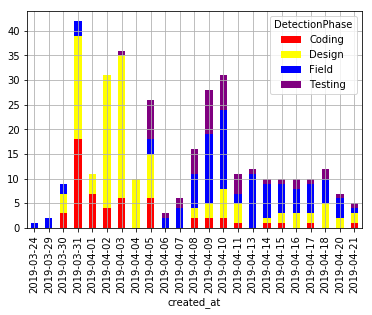

In [38]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=True)

## Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

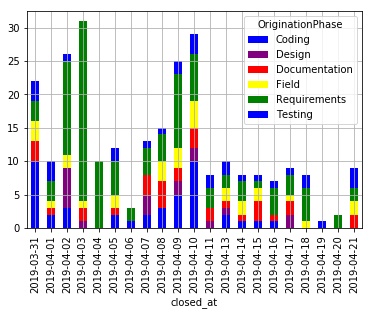

In [39]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=True)

## Requirement #2: Plot in Bar Chart the total number of issues created for every Phase based on their Status

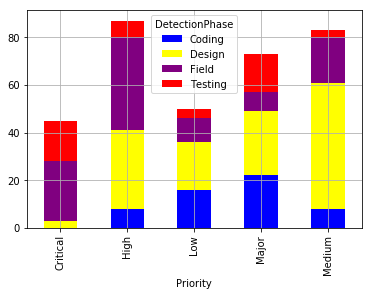

In [40]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  
                                                    color=['blue','yellow', 'purple', 'red', 'green'], grid=True)

In [41]:
LabelsReviewedByPriority = wrangled_issues_df[(wrangled_issues_df.Priority == 'Critical') & (wrangled_issues_df.DetectionPhase == 'Field')].groupby(['Priority','DetectionPhase']).Priority.count()

In [42]:
type(LabelsReviewedByPriority)

pandas.core.series.Series

In [43]:
# LabelsReviewedByPriority.as_matrix

## 1) DetectionPhase is Field AND Priority is Critical

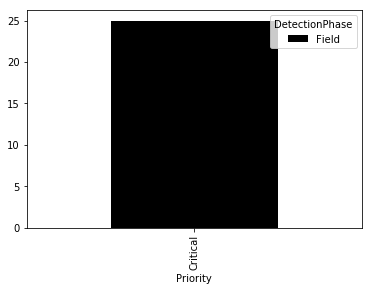

In [44]:
dateLabelsFig = LabelsReviewedByPriority.unstack().plot(kind='bar',stacked=True,  color=['black'], grid=False)

## 2) DetectionPhase is Field AND Status is Completed

In [45]:
LabelsReviewedByStatus = wrangled_issues_df[(wrangled_issues_df.Status == 'Completed') & (wrangled_issues_df.DetectionPhase == 'Field')].groupby(['Status','DetectionPhase']).Priority.count()

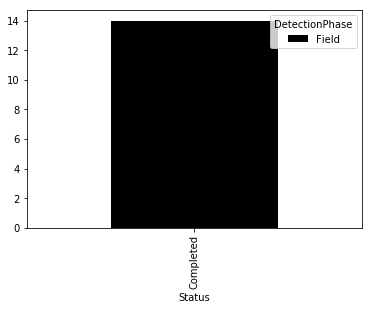

In [46]:
dateLabelsFig = LabelsReviewedByStatus.unstack().plot(kind='bar',stacked=True,  color=['Black'], grid=False)

## 3) DetectionPhase is Field AND Priority is Critical AND Status is Approved

In [47]:
LabelsReviewedByPriorityStatus = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == 'Field') & (wrangled_issues_df.Priority == 'Critical') & (wrangled_issues_df.Status == 'Approved')]



In [48]:
LabelsReviewedByPriorityStatus.head()

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,OritinationPhase,Latitude,Longitude,Detection,Origination
6,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",Testing,Field,Enhancement,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN
33,DSP19SCM781,open,None,2019-04-17,455,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN
42,DSP19SCM781,closed,2019-04-21,2019-04-16,446,"[Category:Enhancement, DetectionPhase:Field, O...",Documentation,Field,Enhancement,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN
52,RSP19SCM781,closed,2019-04-18,2019-04-15,436,"[Category:Bug, DetectionPhase:Field, Originati...",Requirements,Field,Bug,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN
63,TSP19SCM781,closed,2019-04-15,2019-04-14,425,"[Category:Enhancement, DetectionPhase:Field, O...",NaN,Field,Enhancement,Critical,Approved,NaN,Design,NaN,NaN,NaN,NaN


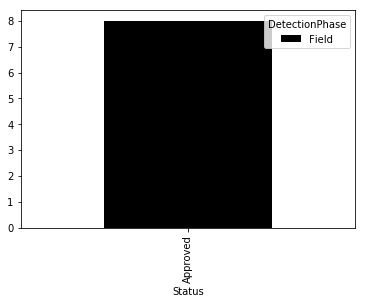

In [49]:
LabelsReviewedByPriorityStatus = LabelsReviewedByPriorityStatus.groupby(['Status','DetectionPhase']).Status.count()
dateLabelsFig = LabelsReviewedByPriorityStatus.unstack().plot(kind='bar',stacked=True,  color=['black'], grid=False)

## 4) DetectionPhase is Field AND Priority is Critical or High AND Status is Approved or inProgress

In [50]:
LabelsReviewedByPriorityStatus = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == 'Field') & ((wrangled_issues_df.Priority == 'Critical') | (wrangled_issues_df.Priority == 'High')) & ((wrangled_issues_df.Status == 'Approved')|(wrangled_issues_df.Status == 'inProgress'))]

In [51]:
LabelsReviewedByPriorityStatus

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,OritinationPhase,Latitude,Longitude,Detection,Origination
6,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",Testing,Field,Enhancement,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN
7,SSP19SCM781,open,None,2019-04-20,484,"[Category:Inquiry, DetectionPhase:Field, Origi...",Design,Field,Inquiry,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
8,SSP19SCM782,open,None,2019-04-20,483,"[Category:Inquiry, DetectionPhase:Field, Origi...",Field,Field,Inquiry,High,Approved,NaN,NaN,NaN,NaN,NaN,NaN
12,YSP19SCM26X,closed,2019-04-19,2019-04-18,477,"[Category:Inquiry, DetectionPhase:Field, Origi...",Testing,Field,Inquiry,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
13,RSP19SCM781,open,None,2019-04-18,476,"[Category:Bug, DetectionPhase:Field, Originati...",Documentation,Field,Bug,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
20,TSP19SCM781,open,None,2019-04-18,469,"[Category:Enhancement, DetectionPhase:Field, O...",Field,Field,Enhancement,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
29,DSP19SCM782,closed,2019-04-21,2019-04-17,459,"[Category:Enhancement, DetectionPhase:Field, O...",Field,Field,Enhancement,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
30,DSP19SCM782,open,None,2019-04-17,458,"[Category:Bug, DetectionPhase:Field, Originati...",Documentation,Field,Bug,High,Approved,NaN,NaN,NaN,NaN,NaN,NaN
31,DSP19SCM782,closed,2019-04-21,2019-04-17,457,"[Category:Inquiry, DetectionPhase:Field, Oriti...",NaN,Field,Inquiry,Critical,inProgress,NaN,Design,NaN,NaN,NaN,NaN
33,DSP19SCM781,open,None,2019-04-17,455,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN


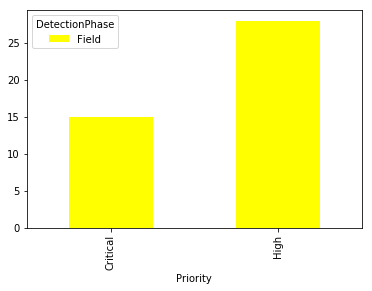

In [52]:
ReviewedByPriority = LabelsReviewedByPriorityStatus.groupby(['Priority','DetectionPhase']).Priority.count()
dateLabelsFig = ReviewedByPriority.unstack().plot(kind='bar',stacked=True,  color=['Yellow'],grid=False)

In [53]:
# plt.plot(len(LabelsReviewedByPriority), LabelsReviewedByPriority)